# **Challenge Nexialog**

#### Objectif du projet
<p style="text-align: justify;">
Des tests sont réalisés dans toutes les boxs, permettant d'identifier implicitement les interruptions de réseau.
L'objectif est de mettre en place une approche non supervisé pour détecter des futurs problèmes sur une partie du réseau → Détection « d’anneaux ». Il faut détecter les noeuds du réseau qui sont défaillants en essayant d’anticiper le plus possible à l’avance.
</p>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import seaborn as sns

### Importation

In [2]:
df = pd.read_parquet(r'data\250327_tests_fixe_dns_sah_202412_202501.parquet', engine="pyarrow")

In [3]:
df.head()

,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total
0,2024-12-01,01,M11,01_olt_3,01_peag_3,BU1464,dsp_1,69_pebib_3,69_lyon,23,6.845641,0.377309,9,11.437500,0.281250,3.258823,0.375156,32
1,2024-12-01,01,M11,01_olt_4,01_peag_3,BU1464,dsp_1,69_pebib_3,69_lyon,10,7.060350,0.392031,4,12.656250,2.079476,2.576471,1.272078,14
2,2024-12-01,01,M13,01_olt_5,01_peag_4,BU458,dsp_1,None,69_lyon,28,2.787241,0.410001,16,8.542969,0.512205,2.868750,0.714469,44
3,2024-12-01,01,M13,71_olt_6,71_peag_5,BU1336,dsp_1,None,69_lyon,4,2.292375,0.241369,2,7.875000,0.000000,3.485294,0.000000,6
4,2024-12-01,01,M20,01_olt_10,01_peag_9,BU460,dsp_1,None,69_lyon,6,6.302625,0.447352,4,11.109375,0.281250,2.880882,0.379412,10


## EDA

#### Exploration

In [5]:
print(df.shape)
df.head()

(9096908, 18)


,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total
0,2024-12-01,01,M11,01_olt_3,01_peag_3,BU1464,dsp_1,69_pebib_3,69_lyon,23,6.845641,0.377309,9,11.437500,0.281250,3.258823,0.375156,32
1,2024-12-01,01,M11,01_olt_4,01_peag_3,BU1464,dsp_1,69_pebib_3,69_lyon,10,7.060350,0.392031,4,12.656250,2.079476,2.576471,1.272078,14
2,2024-12-01,01,M13,01_olt_5,01_peag_4,BU458,dsp_1,None,69_lyon,28,2.787241,0.410001,16,8.542969,0.512205,2.868750,0.714469,44
3,2024-12-01,01,M13,71_olt_6,71_peag_5,BU1336,dsp_1,None,69_lyon,4,2.292375,0.241369,2,7.875000,0.000000,3.485294,0.000000,6
4,2024-12-01,01,M20,01_olt_10,01_peag_9,BU460,dsp_1,None,69_lyon,6,6.302625,0.447352,4,11.109375,0.281250,2.880882,0.379412,10


In [7]:
df.tail(2)

,date_hour,code_departement,olt_model,olt_name,peag_nro,boucle,dsp,pebib,pop_dns,nb_test_dns,avg_dns_time,std_dns_time,nb_test_scoring,avg_latence_scoring,std_latence_scoring,avg_score_scoring,std_score_scoring,nb_client_total
9096906,2025-01-31 23:00:00,95,old1,95_olt_5602,95_peag_2919,BU24,dsp_1,92_pebib_11,77_mit,12,3.548938,0.802115,7,5.6250,0.918559,2.301681,0.235630,19
9096907,2025-01-31 23:00:00,95,old1,95_olt_5603,78_peag_2918,BU22,dsp_1,78_pebib_184,94_cbv,34,2.701279,0.983747,9,5.6875,0.713979,2.273529,0.297753,43


In [44]:
df.nunique()

date_hour               1488
code_departement          96
olt_model                  7
olt_name                6061
peag_nro                3176
boucle                   537
dsp                       32
pebib                    212
pop_dns                    8
nb_test_dns              579
avg_dns_time           35743
std_dns_time           29884
nb_test_scoring          185
avg_latence_scoring    16181
std_latence_scoring    21260
avg_score_scoring       2806
std_score_scoring       1660
nb_client_total          664
dtype: int64

C'est une période de tests de 2 mois avec une fréquence par heure

In [8]:
df.dtypes

date_hour              datetime64[ns]
code_departement               object
olt_model                      object
olt_name                       object
peag_nro                       object
boucle                         object
dsp                            object
pebib                          object
pop_dns                        object
nb_test_dns                     int64
avg_dns_time                  float64
std_dns_time                  float64
nb_test_scoring                 int64
avg_latence_scoring           float64
std_latence_scoring           float64
avg_score_scoring             float64
std_score_scoring             float64
nb_client_total                 int64
dtype: object

In [14]:
def afficher_pourcentage_valeurs_manquantes(df):
    pourcentage_manquantes = round(df.isna().mean() * 100, 2)
    pourcentage_manquantes = pourcentage_manquantes.sort_values(ascending=False)
    print("Pourcentage de valeurs manquantes par variable (en %) :\n")
    print(pourcentage_manquantes)

afficher_pourcentage_valeurs_manquantes(df)

Pourcentage de valeurs manquantes par variable (en %) :

pebib                  44.60
std_score_scoring      23.60
std_latence_scoring    23.60
std_dns_time            9.43
avg_latence_scoring     8.61
avg_score_scoring       8.61
avg_dns_time            7.88
pop_dns                 7.88
olt_model               0.09
date_hour               0.00
code_departement        0.00
nb_test_dns             0.00
peag_nro                0.00
boucle                  0.00
olt_name                0.00
dsp                     0.00
nb_test_scoring         0.00
nb_client_total         0.00
dtype: float64


Preprocessing de la date

In [11]:
df['date_hour'] = pd.to_datetime(df['date_hour'])
df['date_hour'].tail()

Modèles d'OLT :

In [12]:
df.olt_model.unique()

**Observons les liens entre les différentes étapes du réseau**

In [13]:
df['OLT_PEAG_boucle'] = df['olt_name'] + df['peag_nro']  + df['boucle'] 

In [14]:
print('Nombre total de combinaisons OLT x PEAG x boucle :',df['OLT_PEAG_boucle'].nunique())
print('Nombre de noms de OLT :', df.olt_name.nunique())
print('Nombre de noms de PEAG :', df.peag_nro.nunique())
print('Nombre de noms de boucle :', df.boucle.nunique())
print('Nombre de noms de PEBIB :', df.pebib.nunique())
print('Nombre de noms de DSP :', df.dsp.nunique())


# print('Nombre de départements :', df.code_departement.nunique())

Nombre d'associations de chaque noeud à l'autre

In [15]:
print('Nombre d\'OLT par PEAG :', round(df.groupby('peag_nro')['olt_name'].nunique().mean(), 2))
print('Nombre de PEAG par boucle :', round(df.groupby('boucle')['peag_nro'].nunique().mean(), 2))
print('Nombre de boucle par PEBIB :', round(df.groupby('pebib')['boucle'].nunique().mean(), 2))
print('Nombre de PEBIB par DSP :', round(df.groupby('dsp')['pebib'].nunique().mean(), 2))

Nombre de noeuds testés par heure

In [16]:
exemple_date_list = [
    '2024-12-30 23:00:00',
    '2025-01-14 01:00:00',
    '2025-01-01 10:00:00',
    '2024-12-17 12:00:00',
    '2024-12-12 07:00:00'
]

for date in exemple_date_list:
    df_exemple = df[df['date_hour'] == date].copy()
    print('Nombre de boucles testées le', date, ':')
    print('Nombre de lignes pour cette date :', len(df_exemple))
    print('Nombre total de boucles x PEAG x OLT :',df_exemple['OLT_PEAG_boucle'].nunique())
    print('Nombre de noms de OLT :', df_exemple.olt_name.nunique())
    print('Nombre de noms de PEAG :', df_exemple.peag_nro.nunique())
    print('Nombre de noms de PEBIB :', df_exemple.pebib.nunique())
    print('Nombre de noms de DSP :', df_exemple.dsp.nunique())
    print('-'*5)
    print('Nombre de départements :', df_exemple.code_departement.nunique())
    print('-'*50)
    

#### Data Analyse

**Obervons un seul OLT particulier**

In [17]:
olt_choisi = '01_olt_5'

In [18]:
df_one_olt = df[df['olt_name'] == olt_choisi]
print(df_one_olt.shape)
print('Nombre d\'heures :', df_one_olt['date_hour'].nunique())
df_one_olt.head()

24 h * 31 jours * 2 mois = 1488. Ici, on a 1632 lignes, observons pourquoi :

In [19]:
df_one_olt_duplicate = df_one_olt[df_one_olt['date_hour'].duplicated(keep=False)]
print('Nombre de lignes qui ont été dupliquées :', len(df_one_olt_duplicate))

Observons les lignes qui sont dupliquées :

In [20]:
df_one_olt_duplicate.sort_values(by='date_hour', inplace=True)
df_one_olt_duplicate.head()

Cela semble être des erreurs, le même test affiché plusieurs fois. Il faut donc les supprimer.

In [21]:
df_one_olt = df_one_olt.drop_duplicates(subset='date_hour', keep='first')
df_one_olt.shape

**Visualisations**

Ajout de colonnes

In [22]:
pio.renderers.default = 'notebook'
col_palette=['#5533FF','#19A368','#521265','#751818',"#FF5733",'#5533FF','#19A368','#5533FF','#19A368', '#521265']
col_to_plot = ['nb_test_dns', 'avg_dns_time', 'std_dns_time', 'nb_test_scoring', 'avg_latence_scoring',
       'std_latence_scoring', 'avg_score_scoring', 'std_score_scoring', 'nb_client_total']

Lineplots

In [23]:
# visualisation d'un OLT
for i, feature in enumerate(col_to_plot):
    plt.figure(figsize=(10, 5))
    plt.plot(df_one_olt['date_hour'], df_one_olt[feature], label=feature, color=col_palette[i])
    
    plt.title(f"{feature} - {olt_choisi}")
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.grid()

    plt.xticks(rotation=45)
    
    plt.show()

On peut supposer que les pics dans les données de variables de test sont associées à des problèmes sur le réseau. Ce sont certainement des anomalies.

Histogrammes (Distribution)

In [24]:
# Visualisation avec des histogrammes
for i, feature in enumerate(col_to_plot):
    plt.figure(figsize=(10, 5))

    plt.hist(df_one_olt[feature], bins=100, color=col_palette[i], alpha=0.7, label=feature)
    

    plt.title(f"Distribution de {feature} - {olt_choisi}")
    plt.xlabel(feature)
    plt.ylabel('Fréquence')
    
    plt.legend()
    plt.grid(True)

    plt.show()

Les valeurs des queues de distribution sont certainement des anomalies

# Sélection des données

In [2]:
def visualize_distribution_single(df, label):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['count'], bins=30)
    plt.title(f'Distribution of Counts - {label}')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.show()

In [3]:
df = pd.read_parquet(r'data\250327_tests_fixe_dns_sah_202412_202501.parquet', engine="pyarrow")

def select_the_data(df, seuil):
    """  
    Cette fonction récupère un DataFrame et un seuil en paramètre et retourne un nouveau DataFrame
    contenant uniquement les combinaisons PEAG x OLT x PEBIB x boucle x code_departement, après :
      - suppression des doublons,
      - arrondi des colonnes de tests,
      - suppression des lignes avec écarts-types égaux à 0,
      - puis suppression des groupes (basés sur PEAG_OLT_PEBIB) qui ont moins de 'seuil' observations.
    """
    initial_shape = df.shape
    print(f'Shape du DF original : {initial_shape}')

    cols_to_fix = ['avg_dns_time', 'std_dns_time', 'std_latence_scoring', 
                   'std_score_scoring', 'avg_latence_scoring', 'avg_score_scoring']
    std_cols = ['std_dns_time', 'std_latence_scoring', 'std_score_scoring']

    # Arrondir pour éviter que des lignes identiques ne soient considérées différentes
    df[cols_to_fix] = df[cols_to_fix].round(3)
    df['pebib'] = df['pebib'].fillna('PEBIB non defini')

    # Suppression des doublons complets
    df = df.drop_duplicates()
    print('Suppression des doublons complets :', initial_shape[0] - df.shape[0], 'lignes supprimées')
    shape_after_full_drop = df.shape

    # Suppression des doublons sur les colonnes clés
    df = df.drop_duplicates(subset=['date_hour', 'peag_nro', 'olt_name', 'pebib', 'boucle', 
                                      'code_departement', 'olt_model', 'dsp', 'pop_dns'], keep='first')
    print('Suppression des doublons sur colonnes clés :', shape_after_full_drop[0] - df.shape[0], 'lignes supprimées')
    shape_after_subset_drop = df.shape

    # Création de la colonne de combinaison unique
    df['PEAG_OLT_PEBIB'] = (df['peag_nro'].astype(str) + df['olt_name'].astype(str) + 
                            df['pebib'].astype(str) + df['boucle'].astype(str) + 
                            df['code_departement'].astype(str))

    # Suppression des lignes où les écarts-types sont nuls
    for col in std_cols:
        avant = df.shape[0]
        df = df[df[col] != 0]
        print(f"Suppression des lignes avec {col} == 0 : {avant - df.shape[0]} lignes supprimées")

    # À ce stade, on effectue le groupby sur PEAG_OLT_PEBIB et on ne garde que les groupes ayant au moins 'seuil' lignes
    group_counts = df.groupby('PEAG_OLT_PEBIB').size()
    valid_groups = group_counts[group_counts >= seuil].index
    avant_group_filter = df.shape[0]
    df = df[df['PEAG_OLT_PEBIB'].isin(valid_groups)]
    print(f"Suppression des groupes avec moins de {seuil} lignes : {avant_group_filter - df.shape[0]} lignes supprimées")

    # Suppression des colonnes non nécessaires
    # df = df.drop(columns=['olt_model', 'olt_name', 'peag_nro', 'boucle', 'dsp', 'pebib', 'pop_dns', 'nb_client_total'])
    print(f"Finalement, nous avons {df.shape[0]} lignes restantes")

    return df

# Exemple d'utilisation
new_df = select_the_data(df,100)
new_df_grouped = new_df.groupby('PEAG_OLT_PEBIB').size().reset_index(name='count').sort_values(by='count', ascending=False)
new_df.to_csv("new_df.csv", index=False)

Shape du DF original : (9096908, 18)
Suppression des doublons complets : 0 lignes supprimées
Suppression des doublons sur colonnes clés : 0 lignes supprimées
Suppression des lignes avec std_dns_time == 0 : 287 lignes supprimées
Suppression des lignes avec std_latence_scoring == 0 : 873513 lignes supprimées
Suppression des lignes avec std_score_scoring == 0 : 335411 lignes supprimées
Suppression des groupes avec moins de 100 lignes : 17770 lignes supprimées
Finalement, nous avons 7869927 lignes restantes


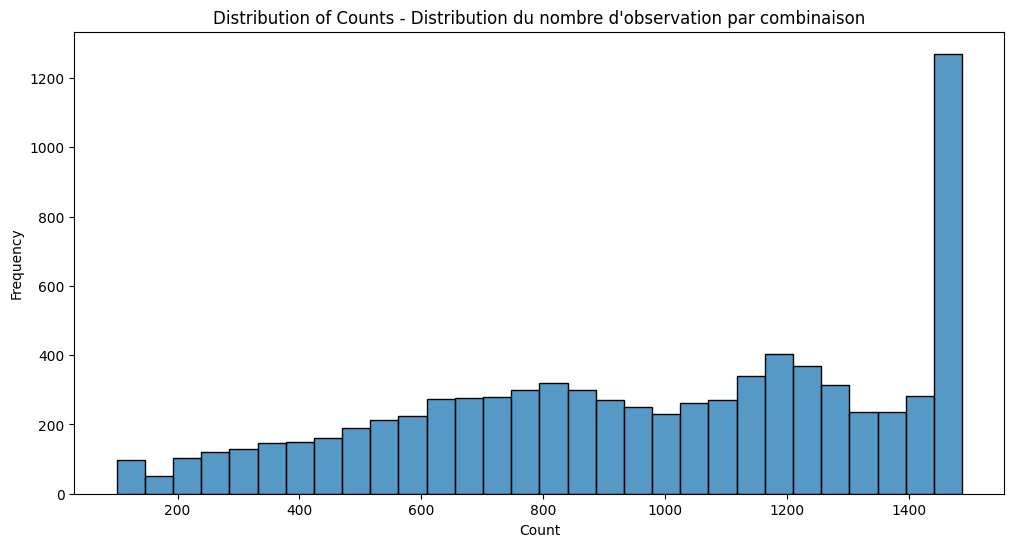

In [4]:
visualize_distribution_single(new_df_grouped, "Distribution du nombre d'observation par combinaison")

In [85]:
new_df_grouped

,PEAG_OLT_PEBIB,count
8052,95_peag_292795_olt_562192_pebib_10BU54095,1488
8053,95_peag_292895_olt_562477_pebib_160BU495,1488
8054,95_peag_292995_olt_562692_pebib_10BU54095,1488
8026,94_peag_291594_olt_559294_pebib_173BU51094,1488
8027,94_peag_291694_olt_559694_pebib_201BU53894,1488
...,...,...
5570,78_peag_239478_olt_474678_pebib_181BU2478,100
5578,78_peag_239578_olt_473478_pebib_134BU151278,100
5724,78_peag_25539_olt_228978_pebib_12FTTH90439,100
1708,33_peag_37719_olt_97733_pebib_47FTTH89623,100


In [5]:
# 1. Séparation entre lignes avec et sans pebib, puisqu'en séparant ainsi les dataframes, on peut par la suite potentiellement remplacer les PEBIBS dans le DF incomplet depuis le DF complet
new_df_pebib_nan = new_df[new_df['pebib'] == 'PEBIB non defini']
new_df_non_pebib_nan = new_df[new_df['pebib'] != 'PEBIB non defini']

# 2. Récupération des OLT communs : on regarde les lignes des 2 DF qui ont les mêmes OLT (granularité la plus large)
olt_nan = set(new_df_pebib_nan['olt_name'].unique())
olt_non_nan = set(new_df_non_pebib_nan['olt_name'].unique())
olt_communs = list(olt_nan & olt_non_nan)

# 3. Sélection des OLT avec un seul pebib défini : ce qui nous intéresse, c'est de trouver les OLT communs qui n'ont ensuite qu'un seul PEBIB défini afin de pouvoir ensuite le remplacer dans le DF incomplet
# En effet, si pour un même OLT, on a plusieurs PEBIBS, on ne peut pas savoir lequel choisir
olt_uniques_pebib = []
for olt in olt_communs:
    df_non_nan_olt = new_df_non_pebib_nan[new_df_non_pebib_nan['olt_name'] == olt]
    if df_non_nan_olt['pebib'].nunique() == 1:
        olt_uniques_pebib.append(olt)

# 4. Construction du résumé OLT
resume_olt = []
for olt in olt_uniques_pebib:
    count_nan = new_df_pebib_nan[new_df_pebib_nan['olt_name'] == olt].shape[0]
    count_def = new_df_non_pebib_nan[new_df_non_pebib_nan['olt_name'] == olt].shape[0]
    pebib_val = new_df_non_pebib_nan[new_df_non_pebib_nan['olt_name'] == olt]['pebib'].unique()[0]
    resume_olt.append({
        'olt_name': olt,
        'nb_lignes_pebib_defini': count_def,
        'nb_lignes_pebib_manquant': count_nan,
        'sum': count_def + count_nan,
        'pebib_unique': pebib_val
    })

df_resume_olt = pd.DataFrame(resume_olt)
df_resume_olt.sort_values(by='sum', ascending=False, inplace=True)
df_resume_olt.reset_index(drop=True, inplace=True)

# 5. Vérification stricte du profil technique pour OLT avec sum ≤ 1488 car plus de 1488 lignes signifie qu'il y a un problème niveau horaire et si un autre élément de la chaine technique diffère
# alors on ne peut pas remplacer avec certitude le PEBIB manquant
verif_profil_strict = []
df_cible = df_resume_olt[df_resume_olt['sum'] <= 1488]

for _, row in df_cible.iterrows():
    olt = row['olt_name']
    df_olt = new_df[new_df['olt_name'] == olt]
    groupe_technique = df_olt.groupby(['code_departement', 'peag_nro', 'boucle']).size()
    profils_identiques = (len(groupe_technique) == 1)
    verif_profil_strict.append({
        'olt_name': olt,
        'nb_lignes_pebib_defini': row['nb_lignes_pebib_defini'],
        'nb_lignes_pebib_manquant': row['nb_lignes_pebib_manquant'],
        'sum': row['sum'],
        'pebib_unique': row['pebib_unique'],
        'profil_technique_identique': profils_identiques
    })

df_verif_profil_strict = pd.DataFrame(verif_profil_strict)

# 6. Imputation des pebib manquants pour les OLT fiables
new_df_pebib_nan_imputed = new_df_pebib_nan.copy()
df_a_imputer = df_verif_profil_strict[df_verif_profil_strict['profil_technique_identique'] == True]

for _, row in df_a_imputer.iterrows():
    mask = new_df_pebib_nan_imputed['olt_name'] == row['olt_name']
    new_df_pebib_nan_imputed.loc[mask, 'pebib'] = row['pebib_unique']

# 7. Reconstruction du DataFrame final
new_df_final = pd.concat([new_df_non_pebib_nan, new_df_pebib_nan_imputed], ignore_index=True)

# 8. Recalcul de la colonne PEAG_OLT_PEBIB
new_df_final['PEAG_OLT_PEBIB'] = (
    new_df_final['peag_nro'].astype(str) +
    new_df_final['olt_name'].astype(str) +
    new_df_final['pebib'].astype(str) +
    new_df_final['boucle'].astype(str) +
    new_df_final['code_departement'].astype(str)
)


In [6]:
new_new_df_grouped = new_df_final.groupby('PEAG_OLT_PEBIB').size().reset_index(name='count').sort_values(by='count', ascending=False)
new_df_final.to_csv("new_df_final.csv", index=False)
new_new_df_grouped

,PEAG_OLT_PEBIB,count
11,01_peag_201_olt_221_pebib_2BU96601,1488
8038,95_peag_292795_olt_562192_pebib_10BU54095,1488
8039,95_peag_292895_olt_562477_pebib_160BU495,1488
8040,95_peag_292995_olt_562692_pebib_10BU54095,1488
8041,95_peag_293095_olt_5628PEBIB non definiBU106095,1488
...,...,...
505,13_peag_30513_olt_623PEBIB non definiBU163683,100
5566,78_peag_239578_olt_473478_pebib_134BU151278,100
5712,78_peag_25539_olt_228978_pebib_12FTTH90439,100
5558,78_peag_239478_olt_474678_pebib_181BU2478,100


In [7]:
# Maintenant continuons sur les chaines qui techniques qui une fois merge entre les OLT, ont plus de 1488 lignes
df_final_extended = new_df_final.copy()

df_ambigus = df_resume_olt[df_resume_olt['sum'] > 1488].copy()

for _, row in df_ambigus.iterrows():
    olt = row['olt_name']
    
    # Sélection des lignes de cet OLT dans le DataFrame final
    df_olt = df_final_extended[df_final_extended['olt_name'] == olt]
    
    # Regroupement par combinaison technique
    grouped = df_olt.groupby(['code_departement', 'peag_nro', 'boucle'])
    
    for keys, group in grouped:
        nb_lignes = group.shape[0]
        pebibs_uniques = group['pebib'].dropna().unique()
        pebibs_valides = [p for p in pebibs_uniques if p != 'PEBIB non defini']
        
        # Condition pour imputation sûre
        if len(pebibs_valides) == 1 and nb_lignes <= 1488:
            pebib_val = pebibs_valides[0]
            mask = (
                (df_final_extended['olt_name'] == olt) &
                (df_final_extended['code_departement'] == keys[0]) &
                (df_final_extended['peag_nro'] == keys[1]) &
                (df_final_extended['boucle'] == keys[2]) &
                (df_final_extended['pebib'] == 'PEBIB non defini')
            )
            df_final_extended.loc[mask, 'pebib'] = pebib_val


# Recalcul de la colonne PEAG_OLT_PEBIB
df_final_extended['PEAG_OLT_PEBIB'] = (
    df_final_extended['peag_nro'].astype(str) +
    df_final_extended['olt_name'].astype(str) +
    df_final_extended['pebib'].astype(str) +
    df_final_extended['boucle'].astype(str) +
    df_final_extended['code_departement'].astype(str)
)

# Résultat final après TOUTES les imputations
new_df_final_v2 = df_final_extended.copy()

In [8]:
new_new_df_grouped = new_df_final_v2.groupby('PEAG_OLT_PEBIB').size().reset_index(name='count').sort_values(by='count', ascending=False)
new_df_final_v2.to_csv("new_df_final.csv", index=False)
new_new_df_grouped

,PEAG_OLT_PEBIB,count
1,01_peag_101_olt_169_pebib_1BU96601,1488
11,01_peag_201_olt_221_pebib_2BU96601,1488
8039,95_peag_293095_olt_5628PEBIB non definiBU106095,1488
3341,57_peag_157557_olt_3300PEBIB non definiBU67657,1488
8020,95_peag_291995_olt_563092_pebib_11BU2495,1488
...,...,...
1700,33_peag_37719_olt_97733_pebib_47FTTH89623,100
5712,78_peag_25539_olt_228978_pebib_12FTTH90439,100
5566,78_peag_239578_olt_473478_pebib_134BU151278,100
5558,78_peag_239478_olt_474678_pebib_181BU2478,100


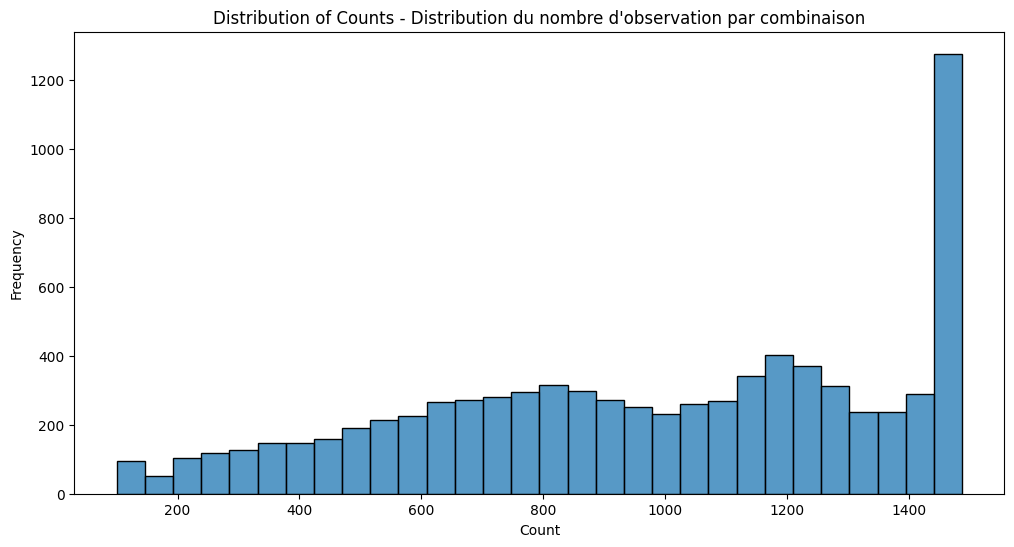

In [9]:
visualize_distribution_single(new_new_df_grouped, "Distribution du nombre d'observation par combinaison")